In [1]:
%matplotlib inline

In [13]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *


In [6]:
level = 4
basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [ ]:
istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnum = 401
H1, xedges1, yedges1 = np.histogram2d(x, y, bins=binnum)
H2, xedges2, yedges2 = np.histogram2d(rxy, z, bins=binnum)
vmin = 1e0
if np.max(H1) > np.max(H2):
    vmax = np.max(H1)
else: vmax = np.max(H2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
h1 = ax1.hist2d(1000*x, 1000*y, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax = vmax)
h2 = ax2.hist2d(1000*rxy, 1000*z, bins=binnum, norm=matplotlib.colors.LogNorm(), cmap = 'inferno', vmin = vmin, vmax= vmax)
ax1.set_xlabel("x [kpc]")
ax1.set_ylabel("y [kpc]")
ax1.set_aspect('equal')
ax2.set_xlabel("R [kpc]")
ax2.set_ylabel("z [kpc]")
ax2.set_aspect('equal')
cbar2 = fig.colorbar(h2[3], ax = ax2 )


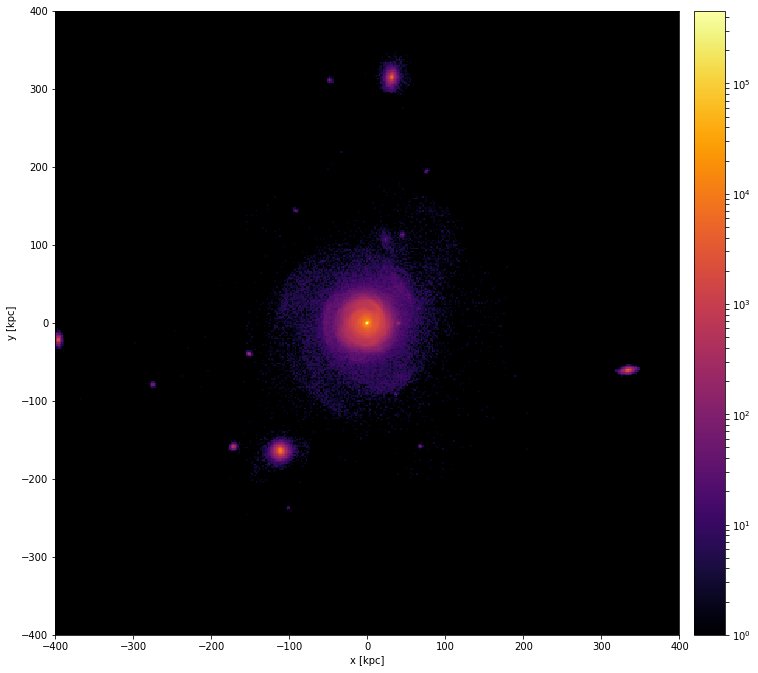

In [18]:
##### 
istars, = np.where( (s.type == 4) & (s.halo == 0) )#& (s.subhalo == 0))
(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, istars)

binnumxx = 401
cmap = copy.copy(plt.cm.inferno)
cmap.set_bad((0,0,0))  # Fill background with black

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
h = ax.hist2d(1000*x, 1000*y, bins=binnumxx, norm=matplotlib.colors.LogNorm(), cmap = cmap, \
           range = [[-400,400], [-400, 400]])
ax.set_xlabel("x [kpc]")
ax.set_ylabel("y [kpc]")
ax.set_aspect('equal')
#fig.colorbar(h[3], ax = ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
fig.colorbar(h[3], cax=cax)
#fig.tight_layout()
fig.savefig('aur_24_xy_distribution.png', dpi = 300, format = 'png', bbox_inches = 'tight')
#fig.show()